In [1]:
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
directorio_de_imagenes="/Users/leonardoomarbolanosrivera/MAESTRIA/SEMESTRE3/MACHINE_LEARNING/repository/Proyecto_final/IMAGENES/MODELOS"
directorios_de_datos="/Users/leonardoomarbolanosrivera/MAESTRIA/SEMESTRE3/MACHINE_LEARNING/repository/Proyecto_final/DATA"

In [3]:
# Reading data and removing index col
df = pd.read_csv(f"{directorios_de_datos}/DataAnalyst_preprocesado_reduced_cardinality.csv")
df.head()

,Job Title,Salary Estimate,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Salary Estimate Min,Salary Estimate Max,Salary Estimate Mean,Sentences in Job Description,Location State,Headquarters Country,Headquarters Country2,Job Title Cat
0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),3.2,Vera Institute of Justice,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),37.0,66.0,51.5,48,NY,United States,United States,Associate Data Analyst
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),3.8,Visiting Nurse Service of New York,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),37.0,66.0,51.5,48,NY,United States,United States,Associate Data Analyst
2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),3.4,Squarespace,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,37.0,66.0,51.5,24,NY,United States,United States,Senior Data Analyst
3,Data Analyst,$37K-$66K (Glassdoor est.),4.1,Celerity,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),37.0,66.0,51.5,28,NY,United States,United States,Associate Data Analyst
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),3.9,FanDuel,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),37.0,66.0,51.5,13,NY,United States,United States,Associate Data Analyst


In [4]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing  import Normalizer

In [5]:
scaler = StandardScaler()
normalizer = Normalizer()

In [6]:
#df=df[((df['Salary Estimate Mean'] >=50) & (df['Salary Estimate Mean'] <=100))]

### Variable para salvar todas las metricas resultantes

In [55]:
# Variables globales
regression_metrics_dict_train=dict()
regression_metrics_dict_test=dict()

## Variable a predecir

In [7]:
#variable a predecir
y=df[["Salary Estimate Mean"]].to_numpy()
y_df=df[["Salary Estimate Mean"]]

In [8]:
y_scaled=scaler.fit_transform(y.reshape(1, -1) )
y_scaled.shape

(1, 2253)

In [9]:
y_normalized= normalizer.fit_transform(y.reshape(1, -1))

## Variables features
- Job Title Cat
- Company Name (REMOVED)
- Location State 
- Headquarters Country or Headquarters Country2

In [10]:
def getParam(params:dict,paramName:str):
    return params[paramName]

In [11]:
features_columnas_categoricas=['Job Title Cat',
                               'Location State',
                               'Headquarters Country2']
feature_names = features_columnas_categoricas
X=df[feature_names[0:len(feature_names)]]

In [12]:
one_hot_encoder = OneHotEncoder()
# passthrough significa que no modifique las otras columnas
transformer = ColumnTransformer([("one_hot",
                                  one_hot_encoder,
                                  features_columnas_categoricas)],
                                  remainder='passthrough')

transformed_X = transformer.fit_transform(X)

In [13]:
transformed_X.nonzero()

(array([   0,    0,    0, ..., 2252, 2252, 2252], dtype=int32),
 array([ 0, 17, 26, ...,  5,  8, 26], dtype=int32))

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# Revisar si se necesita estratificar alguna columna  stratify=
# Split trian (find parameters to minimize the cost function) and test 20 % 
#y_df.iloc[:,0] 
#stratify=y ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2


X_train, X_test, y_train, y_test = train_test_split(transformed_X, y.reshape(-1), test_size = .2, random_state = 42)

# Ni Normalize o Estandarizacion se pueden usar en Y.
#X_train, X_test, y_train, y_test = train_test_split(transformed_X, y_scaled.reshape(-1), test_size = .2, random_state = 42)
#X_train, X_test, y_train, y_test = train_test_split(transformed_X, y_normalized.reshape(-1), test_size = .2, random_state = 42)


In [16]:
X_train.shape

(1802, 27)

In [17]:
X_test.shape

(451, 27)

In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [19]:
def getMetrics(y_true,y_preds):
    metric_results=dict()
    mse=mean_squared_error(y_true, y_preds)
    metric_results["mse"]=mse
    rmse=root_mean_squared_error(y_true, y_preds)
    metric_results["rmse"]=rmse
    msa=mean_absolute_error(y_true, y_preds)
    metric_results["msa"]=msa
    r2_s=r2_score(y_true, y_preds)
    metric_results["r2"]=r2_s

    return metric_results

def printMetrics(model_name,y_true,y_preds):
    metric_results=getMetrics(y_true,y_preds)
    print(f"showing metrics of {model_name}:")
    for key  in metric_results:
        print(f"{key}: {metric_results[key]}")
    print("\n")
    return metric_results

def pretyMetricString(metrics:dict):
    return "mse: %.3f rmse: %.3f msa: %.3f r2: %.3f" % (
        round(metrics["mse"],3),
        round(metrics["rmse"],3),
        round(metrics["msa"],3),
        round(metrics["r2"],3)
        )

In [20]:
def graphPredicted_Vs_Test(y_test,y_predicted,metrics,type_of_regressor,image_name=None,save_image=False):
    y_test_reshaped=y_test.reshape(-1)
    x_cord=np.arange(0,len(y_test_reshaped),1)
    plt.figure(figsize=(10,6))
    plt.scatter(x_cord, y_test_reshaped, label = "Data points test")
    plt.scatter(x_cord, y_predicted, label = "Data points test",c= 'r')
    plt.xlabel("features X ")
    plt.ylabel(f"y/output: Salary Estimate Mean")
    plt.title(f"Comparing y test vs y predicted using {type_of_regressor}\n{pretyMetricString(metrics)}")
    if save_image and image_name!=None:
        save_image_file=image_name
        plt.savefig(f"{directorio_de_imagenes}/{save_image_file}.jpg", dpi=300, transparent=False, bbox_inches='tight')
    plt.show()

In [56]:
def showMetricsAndGraph(model,type_of_regressor,X_train,y_train,X_test,y_test,image_name=None,save_image=False):
    # Fit model
    model.fit(X_train,y_train.reshape(-1))

    # Predict Train
    y_train_predict=model.predict(X_train)
    # Predict Test
    y_test_predict=model.predict(X_test)

    metrics_train=printMetrics(f"{type_of_regressor} [Train] SKLearn",y_train.reshape(-1),y_train_predict)
    metrics_test=printMetrics(f"{type_of_regressor} [Test] SKLearn",y_test.reshape(-1),y_test_predict)
    #Usando  variables Globales
    regression_metrics_dict_train[type_of_regressor]=metrics_train
    regression_metrics_dict_test[type_of_regressor]=metrics_test

    graphPredicted_Vs_Test(y_test,y_test_predict,metrics_test,type_of_regressor,image_name,save_image)

    return {"metrics_train":metrics_train,'metrics_test':metrics_test}

# SGDRegressor
https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.SGDRegressor.html

In [22]:
parameters = {
    'alpha':[0.0001, 0.001,0.01,0.1],
    'penalty' :['l1','l2'],
    'max_iter':[1000,10000,20000]}

In [23]:
modelo = SGDRegressor()
gridsearch = GridSearchCV(estimator=modelo, param_grid = parameters, n_jobs=-1)
gridsearch.fit(X_train, y_train.reshape(-1))

GridSearchCV(estimator=SGDRegressor(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'max_iter': [1000, 10000, 20000],
                         'penalty': ['l1', 'l2']})

In [24]:
gridsearch.best_params_

{'alpha': 0.0001, 'max_iter': 20000, 'penalty': 'l2'}

In [25]:
model_SGDregresion=SGDRegressor(alpha=getParam(gridsearch.best_params_,'alpha'),max_iter=getParam(gridsearch.best_params_,'max_iter'),penalty=getParam(gridsearch.best_params_,'penalty'))
model_SGDregresion

SGDRegressor(max_iter=20000)

In [26]:
model_SGDregresion.fit(X_train,y_train.reshape(-1))

SGDRegressor(max_iter=20000)

showing metrics of SGDRegressor [Train] SKLearn:
mse: 392.7092186258376
rmse: 19.816892254484245
msa: 14.785051369491049
r2: 0.276736947701689


showing metrics of SGDRegressor [Test] SKLearn:
mse: 424.98592483973306
rmse: 20.615186752482575
msa: 15.265524946535685
r2: 0.3038113075110779




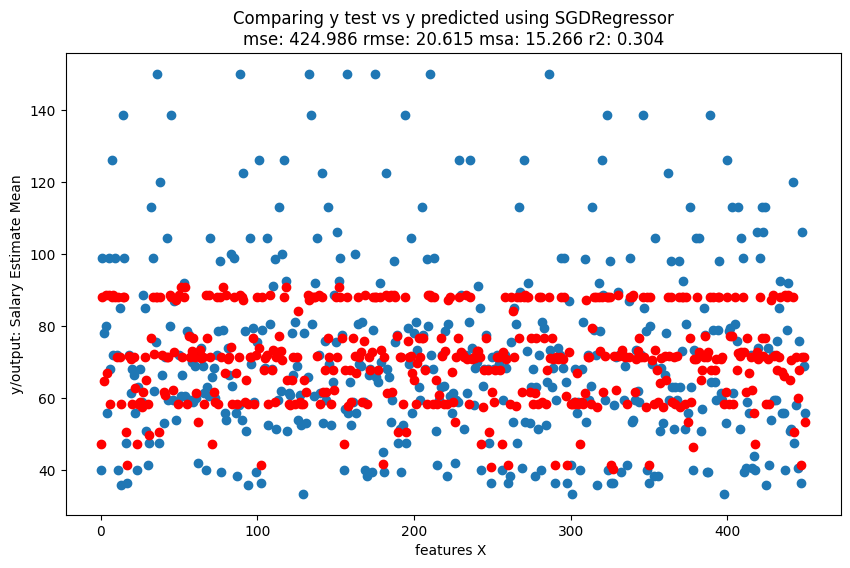

{'metrics_train': {'mse': 392.7092186258376,
  'rmse': 19.816892254484245,
  'msa': 14.785051369491049,
  'r2': 0.276736947701689},
 'metrics_test': {'mse': 424.98592483973306,
  'rmse': 20.615186752482575,
  'msa': 15.265524946535685,
  'r2': 0.3038113075110779}}

In [57]:
showMetricsAndGraph(model_SGDregresion,'SGDRegressor',X_train,y_train,X_test,y_test)

# DecisionTreeRegressor
https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeRegressor.html

In [28]:
params = {
    'criterion': ['squared_error',  'poisson'],
    'max_depth': list(range(1, 10)),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': list(range(1, 10,2)),
}

tree_reg = DecisionTreeRegressor(random_state = 42)
gridsearch_tree_reg = GridSearchCV(tree_reg, params, verbose = 1, cv = 10,n_jobs=-1)

In [29]:
gridsearch_tree_reg.fit(X_train, y_train.reshape(-1))

Fitting 10 folds for each of 270 candidates, totalling 2700 fits


/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'min_samples_leaf': [1, 3, 5, 7, 9],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [30]:
gridsearch_tree_reg.best_params_

{'criterion': 'poisson',
 'max_depth': 9,
 'min_samples_leaf': 9,
 'min_samples_split': 2}

In [31]:
tree_reg = DecisionTreeRegressor(
    criterion=getParam(gridsearch_tree_reg.best_params_,'criterion'),
    max_depth=getParam(gridsearch_tree_reg.best_params_,'max_depth'),
    min_samples_leaf=getParam(gridsearch_tree_reg.best_params_,'min_samples_leaf'),
    min_samples_split=getParam(gridsearch_tree_reg.best_params_,'min_samples_split'),
    )

In [32]:
tree_reg.fit(X_train,y_train.reshape(-1))

DecisionTreeRegressor(criterion='poisson', max_depth=9, min_samples_leaf=9)

showing metrics of DecisionTreeRegressor [Train] SKLearn:
mse: 381.393950694882
rmse: 19.529310041444937
msa: 14.47694094231241
r2: 0.2975765787395168


showing metrics of DecisionTreeRegressor [Test] SKLearn:
mse: 415.3652475361124
rmse: 20.380511464046048
msa: 15.142610254146351
r2: 0.3195713747542256




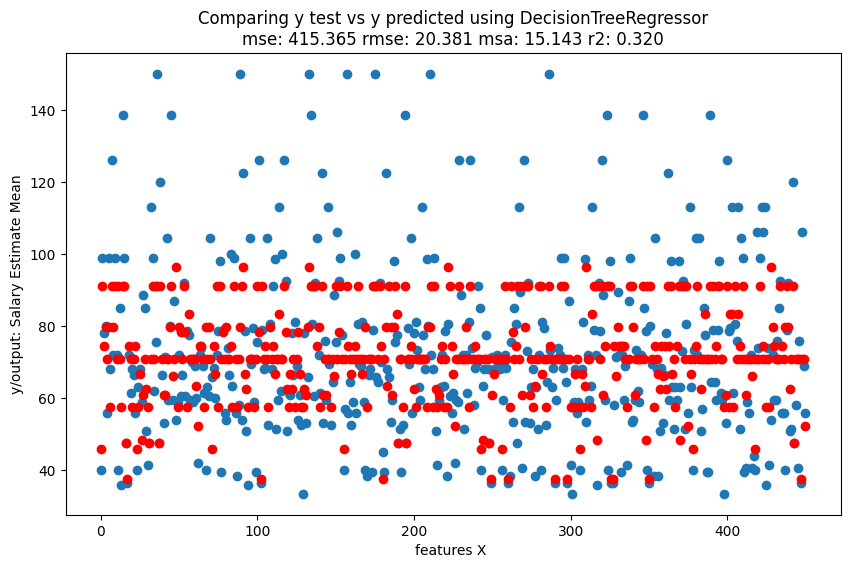

{'metrics_train': {'mse': 381.393950694882,
  'rmse': 19.529310041444937,
  'msa': 14.47694094231241,
  'r2': 0.2975765787395168},
 'metrics_test': {'mse': 415.3652475361124,
  'rmse': 20.380511464046048,
  'msa': 15.142610254146351,
  'r2': 0.3195713747542256}}

In [58]:
showMetricsAndGraph(tree_reg,'DecisionTreeRegressor',X_train,y_train,X_test,y_test)

# Random forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor

In [34]:
params = {
    'criterion': ['squared_error',  'poisson'],
    'n_estimators' : list(range(1, 10,2)),
    'max_depth': list(range(1, 20,2)),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': list(range(1, 4)),
}

random_forest_reg = RandomForestRegressor(random_state = 42)
gridsearch_rf_reg = GridSearchCV(random_forest_reg, params, verbose = 1, cv = 10,n_jobs=-1)

In [35]:
gridsearch_rf_reg.fit(X_train, y_train.reshape(-1))

Fitting 10 folds for each of 900 candidates, totalling 9000 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson'],
                         'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [1, 3, 5, 7, 9]},
             verbose=1)

In [36]:
gridsearch_rf_reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 11,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 9}

In [37]:
random_forest_reg = RandomForestRegressor(
    criterion=getParam(gridsearch_rf_reg.best_params_,'criterion'),
    n_estimators=getParam(gridsearch_rf_reg.best_params_,'n_estimators'),
    max_depth=getParam(gridsearch_rf_reg.best_params_,'max_depth'),
    min_samples_split=getParam(gridsearch_rf_reg.best_params_,'min_samples_split'),
    min_samples_leaf=getParam(gridsearch_rf_reg.best_params_,'min_samples_leaf')
    )

In [38]:
random_forest_reg.fit(X_train,y_train.reshape(-1))

RandomForestRegressor(max_depth=11, min_samples_leaf=2, n_estimators=9)

showing metrics of RandomForestRegressor [Train] SKLearn:
mse: 375.86189807624237
rmse: 19.387158071162528
msa: 14.238871119214842
r2: 0.3077651077392507


showing metrics of RandomForestRegressor [Test] SKLearn:
mse: 408.1645036382835
rmse: 20.203081538178367
msa: 14.921121884125066
r2: 0.33136723947861035




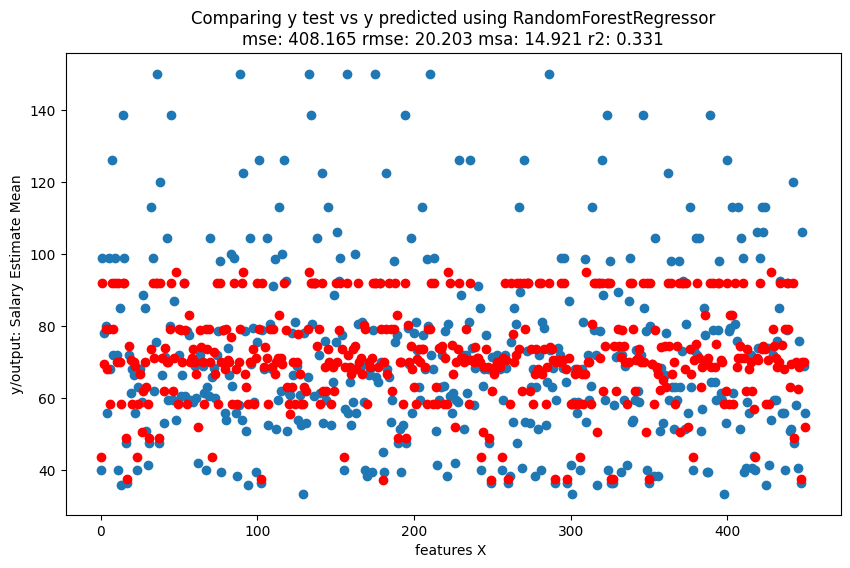

{'metrics_train': {'mse': 375.86189807624237,
  'rmse': 19.387158071162528,
  'msa': 14.238871119214842,
  'r2': 0.3077651077392507},
 'metrics_test': {'mse': 408.1645036382835,
  'rmse': 20.203081538178367,
  'msa': 14.921121884125066,
  'r2': 0.33136723947861035}}

In [59]:
showMetricsAndGraph(random_forest_reg,'RandomForestRegressor',X_train,y_train,X_test,y_test)

# AdaBoostRegressor
https://scikit-learn.org/1.5/modules/generated/sklearn.ensemble.AdaBoostRegressor.html

In [40]:
params = {
    'n_estimators' : list(range(3, 20)),
    'learning_rate': [0.001,0.01, 0.1],
    'loss': ['linear', 'square', 'exponential'],
}

adaBoost_reg = AdaBoostRegressor(random_state = 42)
adaBoost_grid_reg = GridSearchCV(adaBoost_reg, params, verbose = 1, cv = 10,n_jobs=-1)

In [41]:
adaBoost_grid_reg.fit(X_train, y_train.reshape(-1))

Fitting 10 folds for each of 153 candidates, totalling 1530 fits


/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=AdaBoostRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'loss': ['linear', 'square', 'exponential'],
                         'n_estimators': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                          14, 15, 16, 17, 18, 19]},
             verbose=1)

In [42]:
adaBoost_grid_reg.best_params_

{'learning_rate': 0.01, 'loss': 'linear', 'n_estimators': 9}

In [43]:
adaBoost_reg = AdaBoostRegressor(
    learning_rate=getParam(adaBoost_grid_reg.best_params_,'learning_rate'),
    loss=getParam(adaBoost_grid_reg.best_params_,'loss'),
    n_estimators=getParam(adaBoost_grid_reg.best_params_,'n_estimators'),
    )

In [44]:
adaBoost_reg.fit(X_train,y_train.reshape(-1))

AdaBoostRegressor(learning_rate=0.01, n_estimators=9)

showing metrics of AdaBoostRegressor [Train] SKLearn:
mse: 408.69432535438875
rmse: 20.21618968436903
msa: 15.252966918734145
r2: 0.24729674987729922


showing metrics of AdaBoostRegressor [Test] SKLearn:
mse: 453.52519571770375
rmse: 21.296131003487552
msa: 16.048673508256115
r2: 0.2570598352485216




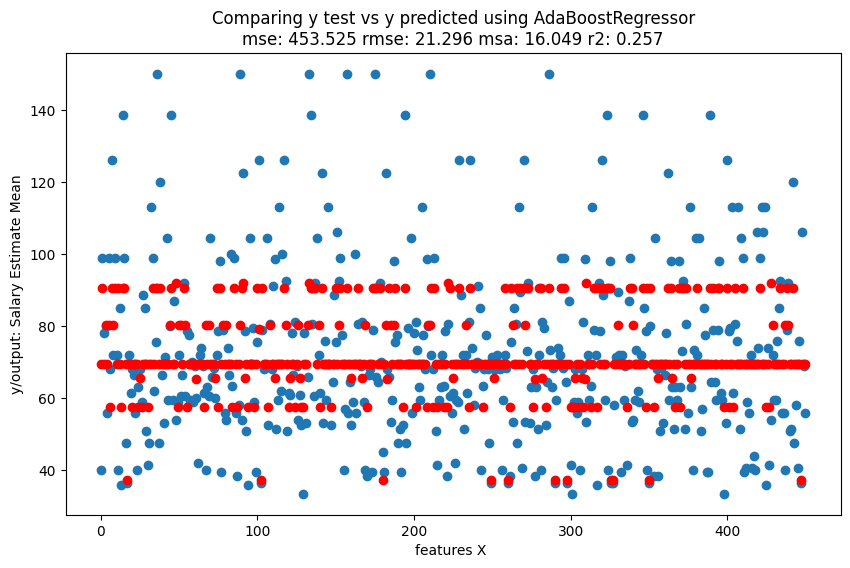

{'metrics_train': {'mse': 408.69432535438875,
  'rmse': 20.21618968436903,
  'msa': 15.252966918734145,
  'r2': 0.24729674987729922},
 'metrics_test': {'mse': 453.52519571770375,
  'rmse': 21.296131003487552,
  'msa': 16.048673508256115,
  'r2': 0.2570598352485216}}

In [60]:
showMetricsAndGraph(adaBoost_reg,'AdaBoostRegressor',X_train,y_train,X_test,y_test)

# QuantileRegressor
https://scikit-learn.org/1.5/modules/generated/sklearn.linear_model.QuantileRegressor.html

# No hay mucha informacion de este modelo

In [46]:
from sklearn.linear_model import QuantileRegressor

In [47]:
from sklearn.utils.fixes import sp_version, parse_version
solver = "highs" if sp_version >= parse_version("1.6.0") else "interior-point"
solver

'highs'

In [48]:
params = {
    'quantile': [0.1,0.2,0.3,0.4,0.5,0.6],
    'solver': ['highs-ds', 'highs-ipm', 'highs', 'revised simplex'],
}


qr_reg = QuantileRegressor()
qr_reg_grid_reg = GridSearchCV(qr_reg, params, cv = 10,n_jobs=-1)

In [49]:
qr_reg_grid_reg.fit(X_train,y_train.reshape(-1))

/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
60 fits failed out of a total of 240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/opt/anaconda3/envs/machine_learning/lib/python3.10/site-packages/sklearn/linear_model/_qua

GridSearchCV(cv=10, estimator=QuantileRegressor(), n_jobs=-1,
             param_grid={'quantile': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6],
                         'solver': ['highs-ds', 'highs-ipm', 'highs',
                                    'revised simplex']})

In [50]:
qr_reg_grid_reg.best_params_

{'quantile': 0.6, 'solver': 'highs-ds'}

In [51]:
qr_reg = QuantileRegressor(
    quantile=getParam(qr_reg_grid_reg.best_params_,'quantile'),
    solver=getParam(qr_reg_grid_reg.best_params_,'solver'),
    )

showing metrics of QuantileRegressor [Train] SKLearn:
mse: 546.2072825318158
rmse: 23.37107790693052
msa: 17.87396059834839
r2: -0.005964534608802197


showing metrics of QuantileRegressor [Test] SKLearn:
mse: 615.2261640798226
rmse: 24.80375302408534
msa: 19.239467849223946
r2: -0.00782984499363959




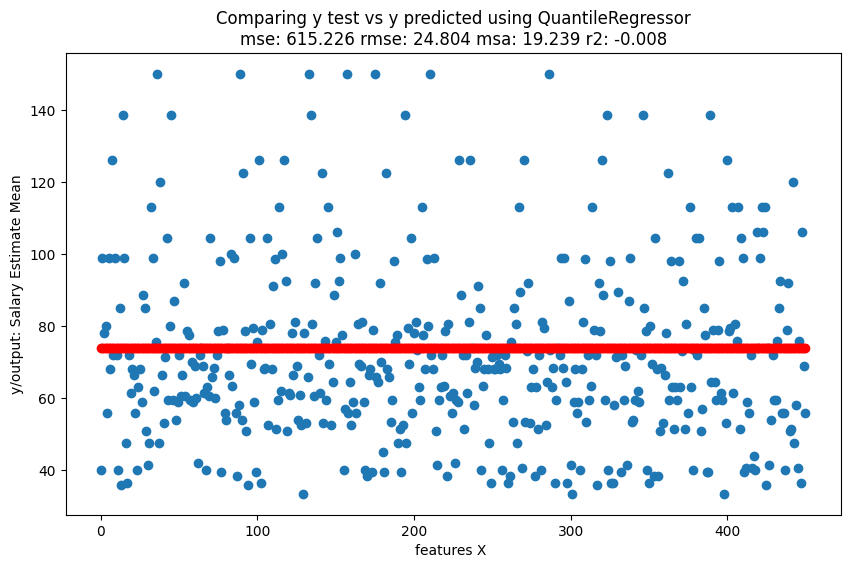

{'metrics_train': {'mse': 546.2072825318158,
  'rmse': 23.37107790693052,
  'msa': 17.87396059834839,
  'r2': -0.005964534608802197},
 'metrics_test': {'mse': 615.2261640798226,
  'rmse': 24.80375302408534,
  'msa': 19.239467849223946,
  'r2': -0.00782984499363959}}

In [61]:
showMetricsAndGraph(qr_reg,'QuantileRegressor',X_train,y_train,X_test,y_test)

# Creamos las graficas correspondientes a los resultados obtenidos

In [75]:
def generateDataFrameResults(regression_metrics_dict):
    return pd.DataFrame(regression_metrics_dict).T.reset_index()


In [62]:
regression_metrics_dict_train
regression_metrics_dict_test

{'SGDRegressor': {'mse': 424.98592483973306,
  'rmse': 20.615186752482575,
  'msa': 15.265524946535685,
  'r2': 0.3038113075110779},
 'DecisionTreeRegressor': {'mse': 415.3652475361124,
  'rmse': 20.380511464046048,
  'msa': 15.142610254146351,
  'r2': 0.3195713747542256},
 'RandomForestRegressor': {'mse': 408.1645036382835,
  'rmse': 20.203081538178367,
  'msa': 14.921121884125066,
  'r2': 0.33136723947861035},
 'AdaBoostRegressor': {'mse': 453.52519571770375,
  'rmse': 21.296131003487552,
  'msa': 16.048673508256115,
  'r2': 0.2570598352485216},
 'QuantileRegressor': {'mse': 615.2261640798226,
  'rmse': 24.80375302408534,
  'msa': 19.239467849223946,
  'r2': -0.00782984499363959}}

In [76]:
results_metrics_train_df=generateDataFrameResults(regression_metrics_dict_train)
results_metrics_train_df

,index,mse,rmse,msa,r2
0,SGDRegressor,392.709219,19.816892,14.785051,0.276737
1,DecisionTreeRegressor,381.393951,19.529310,14.476941,0.297577
2,RandomForestRegressor,375.861898,19.387158,14.238871,0.307765
3,AdaBoostRegressor,408.694325,20.216190,15.252967,0.247297
4,QuantileRegressor,546.207283,23.371078,17.873961,-0.005965


In [77]:
results_metrics_test_df=generateDataFrameResults(regression_metrics_dict_test)
results_metrics_test_df

,index,mse,rmse,msa,r2
0,SGDRegressor,424.985925,20.615187,15.265525,0.303811
1,DecisionTreeRegressor,415.365248,20.380511,15.142610,0.319571
2,RandomForestRegressor,408.164504,20.203082,14.921122,0.331367
3,AdaBoostRegressor,453.525196,21.296131,16.048674,0.257060
4,QuantileRegressor,615.226164,24.803753,19.239468,-0.007830


In [95]:
def grapResultsFromRegressionMetricsDataFrames(df_metrics_train,df_metrics_test):
    fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(14, 14))
    sns.lineplot(data=df_metrics_train,x='index',y='mse' ,ax=axes[0],label='train')
    sns.lineplot(data=df_metrics_test,x='index',y='mse' ,ax=axes[0],label='test')
    axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[0].grid()

    sns.lineplot(data=df_metrics_train,x='index',y='rmse',ax=axes[1],label='train')
    sns.lineplot(data=df_metrics_test,x='index',y='rmse',ax=axes[1],label='test')
    axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[1].grid()

    sns.lineplot(data=df_metrics_train,x='index',y='msa' ,ax=axes[2],label='train')
    sns.lineplot(data=df_metrics_test,x='index',y='msa' ,ax=axes[2],label='test')
    axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[2].grid()

    sns.lineplot(data=df_metrics_train,x='index',y='r2' ,ax=axes[3],label='train')
    sns.lineplot(data=df_metrics_test,x='index',y='r2' ,ax=axes[3],label='test')
    axes[3].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[3].grid()



    fig.tight_layout()
    plt.show()

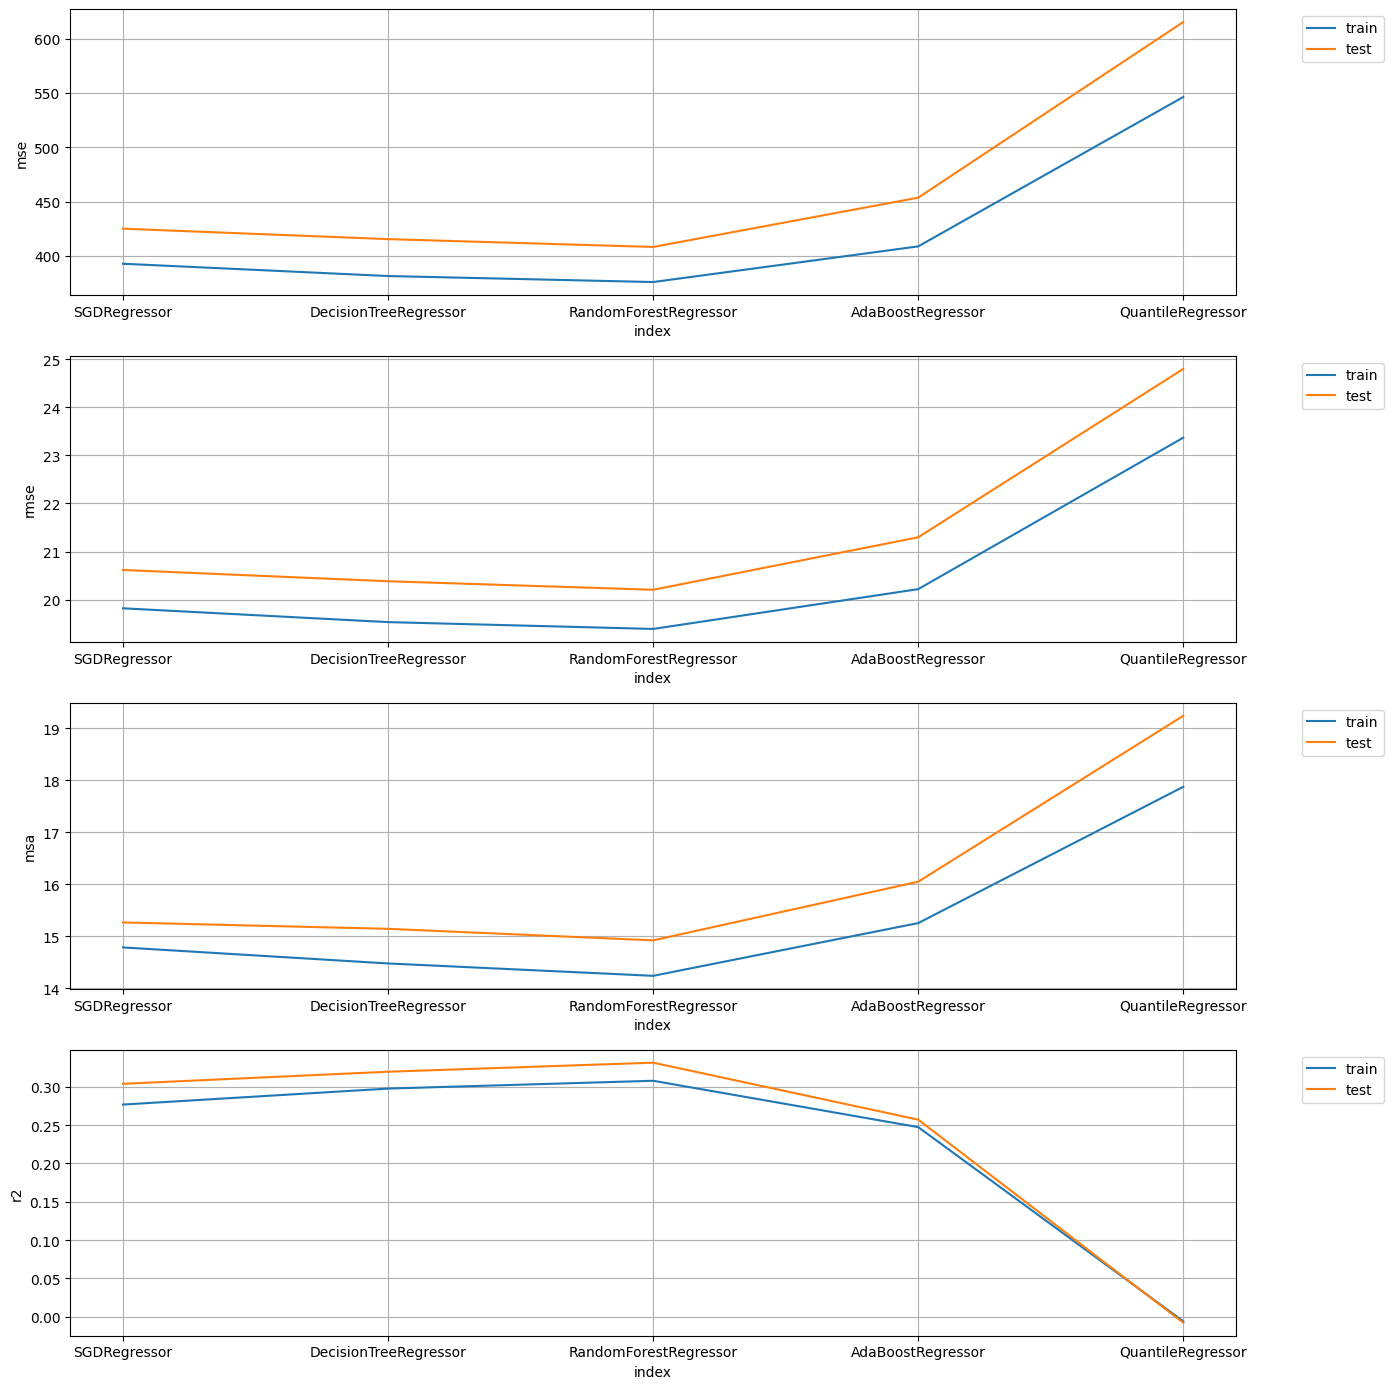

In [96]:
grapResultsFromRegressionMetricsDataFrames(results_metrics_train_df,results_metrics_test_df)